In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv("data.csv")

In [151]:
df.insert(10, "month_year", value = str(df['month']) + str(df['year'])

SyntaxError: unexpected EOF while parsing (<ipython-input-151-acb2067642c3>, line 1)

In [149]:
df.head()

,order_id,order_count,product,quantity,price,total,full_date,hour,date,month,month_year,year,day,address,city,state,pincode,timezone
0,236670,1,Wired Headphones,2,11.99,23.98,08/31/19,22,31,8,2027,2019,Sat,359 Spruce St,Seattle,WA,98101,PM
1,236671,1,Bose SoundSport Headphones,1,99.99,99.99,08/15/19,15,15,8,2027,2019,Thu,492 Ridge St,Dallas,TX,75001,PM
2,236672,1,iPhone,1,700.00,700.00,08/06/19,14,6,8,2027,2019,Tue,149 7th St,Portland,OR,97035,PM
3,236673,1,AA Batteries (4-pack),2,3.84,7.68,08/29/19,20,29,8,2027,2019,Thu,631 2nd St,Los Angeles,CA,90001,PM
4,236674,1,AA Batteries (4-pack),2,3.84,7.68,08/15/19,19,15,8,2027,2019,Thu,736 14th St,New York City,NY,10001,PM


### Q1. What is the 4th highest product sold in terms of total revenue generated overall ?

In [34]:

df.groupby('product').count()['total'].sort_values(ascending = False)
#The 4th highest item selling is AA Batteries (4-pack) with 20577 sales in total

product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: total, dtype: int64

### Q2. Which City sees the maximum number of orders being placed in the month of June 2019?

In [13]:
df_time = df[df['month'] == 6]
df_time = df_time[df['year'] == 2019]
df_time.groupby('city').count()['quantity'].sort_values(ascending = False)
#the city with the most orders being placed is San Francisco in June 2019

<ipython-input-13-c9b3d6f0fb96>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_time = df_time[df['year'] == 2019]


city
San Francisco    3303
Los Angeles      2203
New York City    1775
Boston           1390
Atlanta          1107
Dallas           1063
Seattle          1056
Portland          942
Austin            715
Name: quantity, dtype: int64

### Q3. What is the least popular product in terms of unique orders in the city of Los Angeles. ?

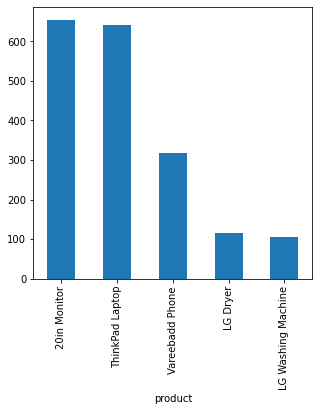

In [45]:
df_los = df[df['city'] == 'Los Angeles']
df_los.groupby('product').count()['quantity'].sort_values(ascending = False).tail().plot.bar(figsize = (5,5))
#Seems like LG Washing Machine has the least unique orders overall

### Q4. Which state has the highest revenue generated from all the apple products in year 2019?  Hint { Apple products : Apple airpods, iphone, Macbook} 


In [41]:
df_apple_2019 = df[df['year'] ==2019]
df_airpods = df_apple_2019[df_apple_2019['product'] == 'Apple Airpods Headphones']
df_macbook = df_apple_2019[df_apple_2019['product'] == 'Macbook Pro Laptop']
df_iphone= df_apple_2019[df_apple_2019['product'] == 'iPhone']
df_airpods.groupby('state').count()['quantity'].sort_values(ascending = False)


state
CA    6154
NY    2079
TX    2069
MA    1642
GA    1263
WA    1250
OR     860
ME     228
Name: quantity, dtype: int64

In [42]:
df_macbook.groupby('state').count()['quantity'].sort_values(ascending = False)

state
CA    1885
NY     656
TX     632
MA     478
GA     379
WA     356
OR     274
ME      63
Name: quantity, dtype: int64

In [43]:
df_iphone.groupby('state').count()['quantity'].sort_values(ascending = False)
#Overall, CA has the most even among 3 types of devices selling so it's California

state
CA    2776
TX     896
NY     880
MA     752
WA     545
GA     542
OR     370
ME      79
Name: quantity, dtype: int64

### Q5. What is the difference of revenue generated between weekend and weekday in the state of CA ? Hint { Weekday : Mon – Thu, Weekend : Fri – Sun}

In [85]:
df_CA = df[df['state'] == 'CA']
df_CA_mon = df_CA[df_CA['day'] == 'Mon']
df_CA_tue = df_CA[df_CA['day'] == 'Tue']
df_CA_wed = df_CA[df_CA['day'] == 'Wed']
df_CA_thu = df_CA[df_CA['day'] == 'Thu']
df_CA_fri = df_CA[df_CA['day'] == 'Fri']
df_CA_sat = df_CA[df_CA['day'] == 'Sat']
df_CA_sun = df_CA[df_CA['day'] == 'Sun']
monsum = df_CA_mon['total'].sum()
tuesum = df_CA_tue['total'].sum()
wedsum = df_CA_wed['total'].sum()
thusum = df_CA_thu['total'].sum()
frisum = df_CA_fri['total'].sum()
satsum = df_CA_sat['total'].sum()
sunsum = df_CA_sun['total'].sum()
wd = monsum + tuesum + wedsum + thusum
wk = frisum + satsum + sunsum
diff = wd - wk
print (int(diff))
#There's $2,116,605 revenue difference generated between weekend and weekday 

2116605


### Q6. Which city has seen the overall least orders in night hours in the months of May, June and July 2019. Hint { Night Hours : 18 – 24 } 


In [152]:

df_may = df[df['month']== '5']
df_may_18 = df_may[df_may['hour']== '18']
df_may_19 = df_may[df_may['hour']== '19']
df_may_20 = df_may[df_may['hour']== '20']
df_may_21 = df_may[df_may['hour']== '21']
df_may_22 = df_may[df_may['hour']== '22']
df_may_23 = df_may[df_may['hour']== '23']
df_may_24 = df_may[df_may['hour']== '24']

df_june = df[df['month']== '6']
df_june_18 = df_june[df_june['hour']== '18']
df_june_19 = df_june[df_june['hour']== '19']
df_june_20 = df_june[df_june['hour']== '20']
df_june_21 = df_june[df_june['hour']== '21']
df_june_22 = df_june[df_june['hour']== '22']
df_june_23 = df_june[df_june['hour']== '23']
df_june_24 = df_june[df_june['hour']== '24']

df_july = df[df['month']== '7']
df_july_18 = df_july[df_july['hour']== '18']
df_july_19 = df_july[df_july['hour']== '19']
df_july_20 = df_july[df_july['hour']== '20']
df_july_21 = df_july[df_july['hour']== '21']
df_july_22 = df_july[df_july['hour']== '22']
df_july_23 = df_july[df_july['hour']== '23']
df_july_24 = df_july[df_july['hour']== '24']


C:\Users\Khang\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Series([], Name: hour, dtype: int64)

### Q7. Is “Google Phone” better performing in respect to overall number of orders placed as well as  revenue generated than “iphone” in “New York City” ?

### Q8. What is the absolute difference in total number of unique orders being created in the cities of “Boston” and “Portland” for the month of Jan in both years 2019 & 2020 ?


### Q9. Plot pie chart for 4 categories based on their total revenue generated.  Weekend-Day , Weekend-Night, Weekday-Day, Weekday-Night.  Hint {Weekend/Weekday , Day/Night logic remains as earlier discussed}


In [ ]:
df_wd_
colors = sns.color_palette('pastel')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Q10. Plot violin plot between above respective 13 categories of unique year month combinations Month_Year ( 1_2019 , 2_2019 …. 1_2020) along side the number of orders being placed. Write down  the inferences according to the graph. (minimum 5)

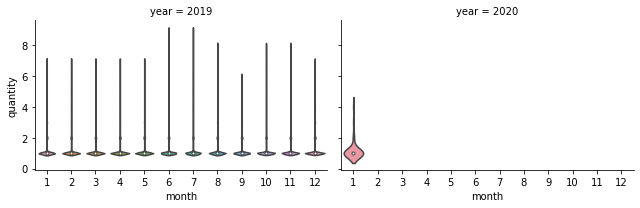

In [122]:

len(orders_id)(month)(year)
sns.catplot(x="month", y="quantity", col="year", data=df, kind="violin", split=False, height=3, aspect=1.5);
#Obs 1: No observation are made here due to can't convert the groupby into plot
#Obs 2: 
#Obs 3:
#Obs 4:
#Obs 5:

In [145]:
df_2019 = df[df['year'] == 2019]

df_2019.groupby('month').count()['order_count'].sort_values(ascending = False)
#can't convert the groupby into plot

month
12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9675
Name: order_count, dtype: int64

In [143]:
df_2020 = df[df['year'] == 2020]
df_2020.groupby('month').count()['order_count'].sort_values(ascending = False)

month
1    34
Name: order_count, dtype: int64

In [124]:
sns.catplot(x="month", y="id", col="year", data=df, kind="violin", split=False, height=3, aspect=1.5);
#Obs 1: There's a spike increase in the number of orders throughout 2019
#Obs 2: 2020 has the least amount of orders
#Obs 3: highest peak near the end of 2019 (Oct, Nov, Dec)
#Obs 4: second highest peak is near mid-2019 (Apr, May) before fall down and rise over time again
#Obs 5:

ValueError: Could not interpret input 'id'